# SPI - Historical data - Cork Airport

In [2]:
# set working directory to root
setwd("../../")

In [3]:
# import requirements and functions
source(
    "./jupyter-notebooks/scripts/spi-spei.R",
    echo = TRUE,
    max.deparse.length = 2000
)


> library(eurocordexr)


Loading required package: data.table

Loading required package: magrittr

Loading required package: ncdf4

Loading required package: ncdf4.helpers




> library(SPEI)


Loading required package: lmomco

Loading required package: parallel

Loading required package: ggplot2

# Package SPEI (1.7) loaded [try SPEINews()].




> library(latticeExtra)


Loading required package: lattice


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer





> library(lubridate)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union





> kelvin_to_celsius <- function(kelvin) {
+     celsius <- (kelvin - 273.15)
+     return(celsius)
+ }

> kgm2s_to_mmday <- function(kgm2s) {
+     mmday <- (kgm2s * 60 * 60 * 24)
+     return(mmday)
+ }

> ec_process <- function(datapath, indexcell, var) {
+     df <- nc_grid_to_dt(filename = datapath, variable = var)
+     df <- subset(df, icell == indexcell)
+     df$date <- as.Date(df$date, format = "%Y-%m-%d")
+     df$month <- month(df$date, label = TRUE)
+     df$year <- year(df$date)
+     if (var == "pr") {
+         df$pr <- kgm2s_to_mmday(df$pr)
+     }
+     else if (var == "tasmax") {
+         df$tasmax <- kelvin_to_celsius(df$tasmax)
+     }
+     else if (var == "tasmin") {
+         df$tasmin <- kelvin_to_celsius(df$tasmin)
+     }
+     return(df)
+ }

> hist_process <- function(datadir, variable, indexcell) {
+     ncfile <- paste(datadir, variable, "_EUR-11_NCC-NorESM1-M_historical_r1i1p1_DMI-HIRHAM5_v3_mon_", 
+         sep = "")
+     d1 <- ec_process(datapath = 

In [4]:
# Cork Airport grid cell
indexcell <- 68801

# directory where the historical nc files are stored
datadir <- "./data/eurocordex/DMI/historical/mon/"

In [5]:
# process precipitation data
pr <- hist_process(datadir = datadir, variable = "pr", indexcell = indexcell)

In [6]:
head(pr)

pr,month,year
<dbl>,<ord>,<dbl>
3.902974,Jan,1976
6.861049,Feb,1976
4.887853,Mar,1976
3.667969,Apr,1976
3.170111,May,1976
5.109375,Jun,1976


In [7]:
dcast(pr, year~month, value.var = c("pr"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,3.902974,6.861049,4.887853,3.667969,3.1701108,5.1093749,1.8719758,4.4231350,4.0643230,3.218750,4.762240,5.481351
1977,8.893145,2.312221,4.000000,4.880729,2.4727822,1.7151041,3.3772681,1.8928931,2.1231770,3.553679,2.808333,3.469758
1978,2.589970,2.392578,4.922127,4.527344,2.5521674,2.0010417,2.8802924,2.2726815,2.3825520,2.784778,7.133333,3.614163
1979,3.309980,2.128627,3.158266,4.671875,1.2323588,3.4466146,2.1945564,1.3452621,4.4966146,2.845010,2.828646,2.947581
1980,2.175151,5.357422,3.448085,7.453646,2.9785788,1.8669270,1.7343750,2.6607863,2.5125000,3.998740,5.252604,6.820061
1981,4.717742,3.814174,6.380544,4.165885,3.5995464,1.4820312,2.1502016,3.1113912,3.0809897,3.513357,4.857031,3.559980
1982,3.882308,3.512277,3.746472,3.466927,3.6073589,1.2916667,1.3503024,1.2159778,3.3101564,3.708669,4.835677,2.573337
1983,1.799647,5.258092,5.541583,7.255729,0.5244456,1.5085937,0.9700100,2.4740424,4.0557292,3.884073,6.238021,3.534778
1984,2.918095,3.333426,3.324093,3.977344,1.6192036,2.6395832,1.9798386,3.1421371,2.4091146,4.905494,6.964323,3.477823


## SPI-12

### Arguments

- kernel: unshifted rectangular kernel
- distribution: gamma
- fit: unbiased probability weighted moments

In [8]:
spi <- spi_calc(data = pr, spi_num = 12)

In [9]:
# view the data
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2.67956548
1977,3.1150255,2.74502297,2.685370420,3.37377130,3.09973444,2.53207803,2.79232235,2.10003333,1.72574443,1.94603593,1.333175565,0.61594201
1978,-0.7704685,-0.83388592,-0.629690214,-0.82273964,-0.76395044,-0.69805416,-0.81564230,-0.64566075,-0.62850966,-0.92789007,0.383736820,0.28880303
1979,0.3750844,0.39737443,-0.001302363,0.04341877,-0.30833433,0.12140121,-0.07237720,-0.29128885,0.25973087,0.29049336,-0.926446190,-1.01962097
1980,-1.1493779,-0.48756920,-0.431497640,0.28560270,0.73273284,0.38211367,0.24292333,0.58948068,0.06528365,0.40378080,1.042611835,1.64221280
1981,1.8540567,1.83821672,2.526753273,2.12593642,2.19791370,2.29303220,2.30674380,2.31334078,2.56650690,2.63834620,2.372559437,1.25713355
1982,0.9156603,1.01013193,0.453549294,0.33777826,0.33295312,0.33785589,0.10705811,-0.37651486,-0.35335098,-0.32954783,-0.286821723,-0.54959824
1983,-0.9396195,-0.61670787,-0.192169053,0.81632561,-0.01241389,0.08336449,-0.02468347,0.32650760,0.52764926,0.61285955,0.963409197,0.95735695
1984,1.0211354,0.78085225,0.303150005,-0.56242595,-0.23555001,0.10796567,0.37865045,0.55245119,0.11799203,0.42095221,0.609750806,0.43396168


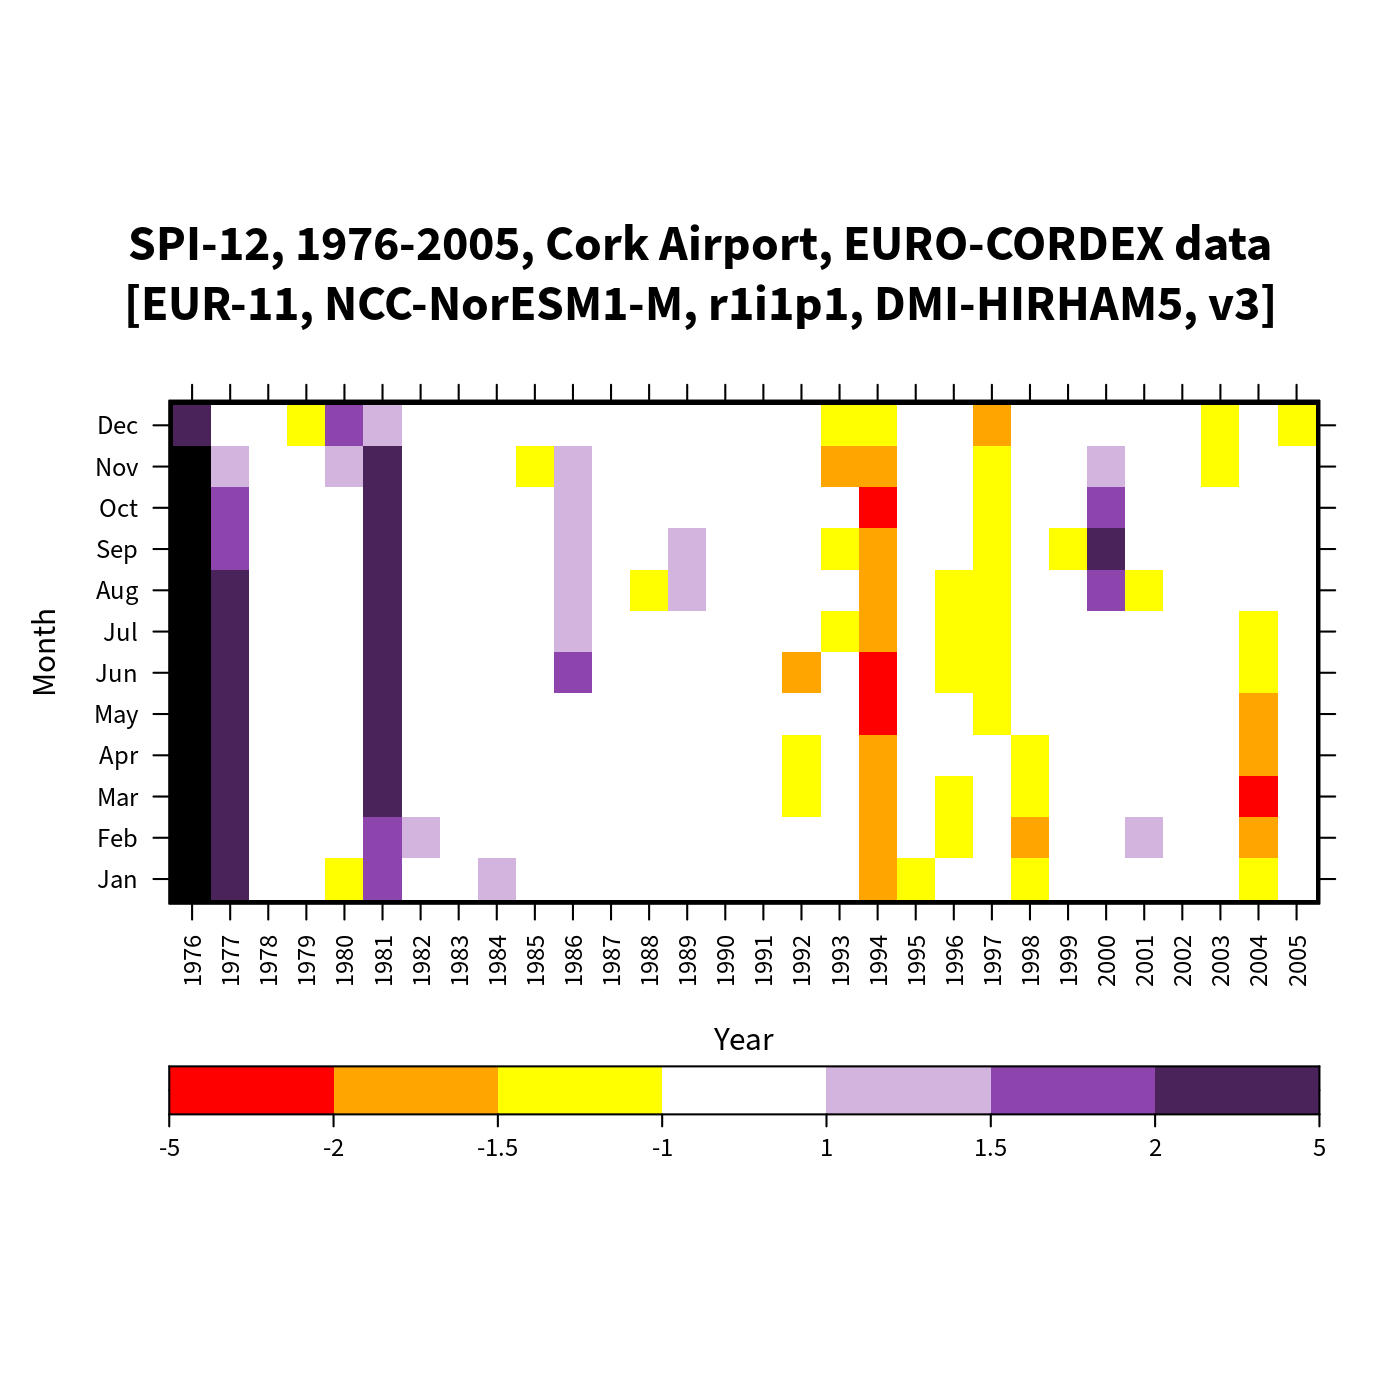

In [11]:
plot_title <- paste(
    "SPI-12, 1976-2005, Cork Airport, EURO-CORDEX data",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spi, plot_title = plot_title)

### Arguments

- kernel: unshifted rectangular kernel
- distribution: PearsonIII (non-default)
- fit: unbiased probability weighted moments

In [33]:
spi <- spi_calc(data = pr, spi_num = 12, distribution = "PearsonIII")

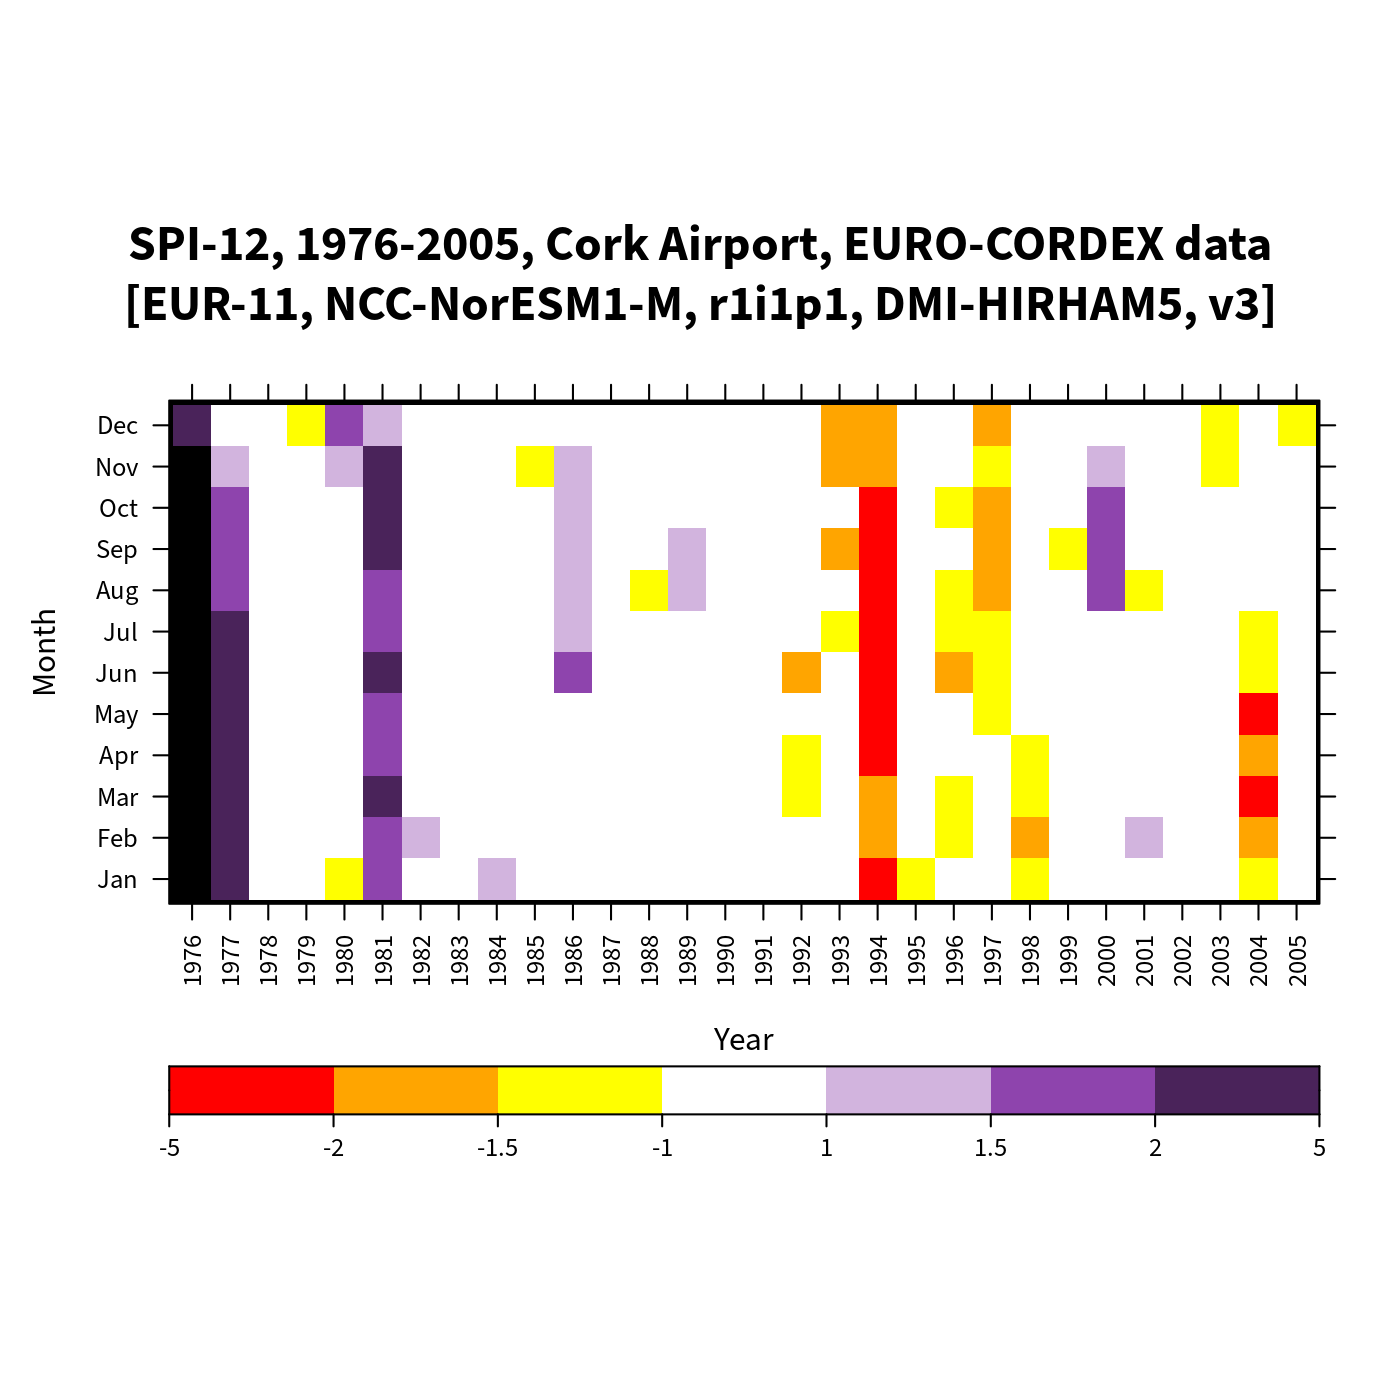

In [34]:
plot_title <- paste(
    "SPI-12, 1976-2005, Cork Airport, EURO-CORDEX data",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spi, plot_title = plot_title)

### Arguments

- kernel: unshifted rectangular kernel
- distribution: log-Logistic (non-default)
- fit: unbiased probability weighted moments

In [35]:
spi <- spi_calc(data = pr, spi_num = 12, distribution = "log-Logistic")

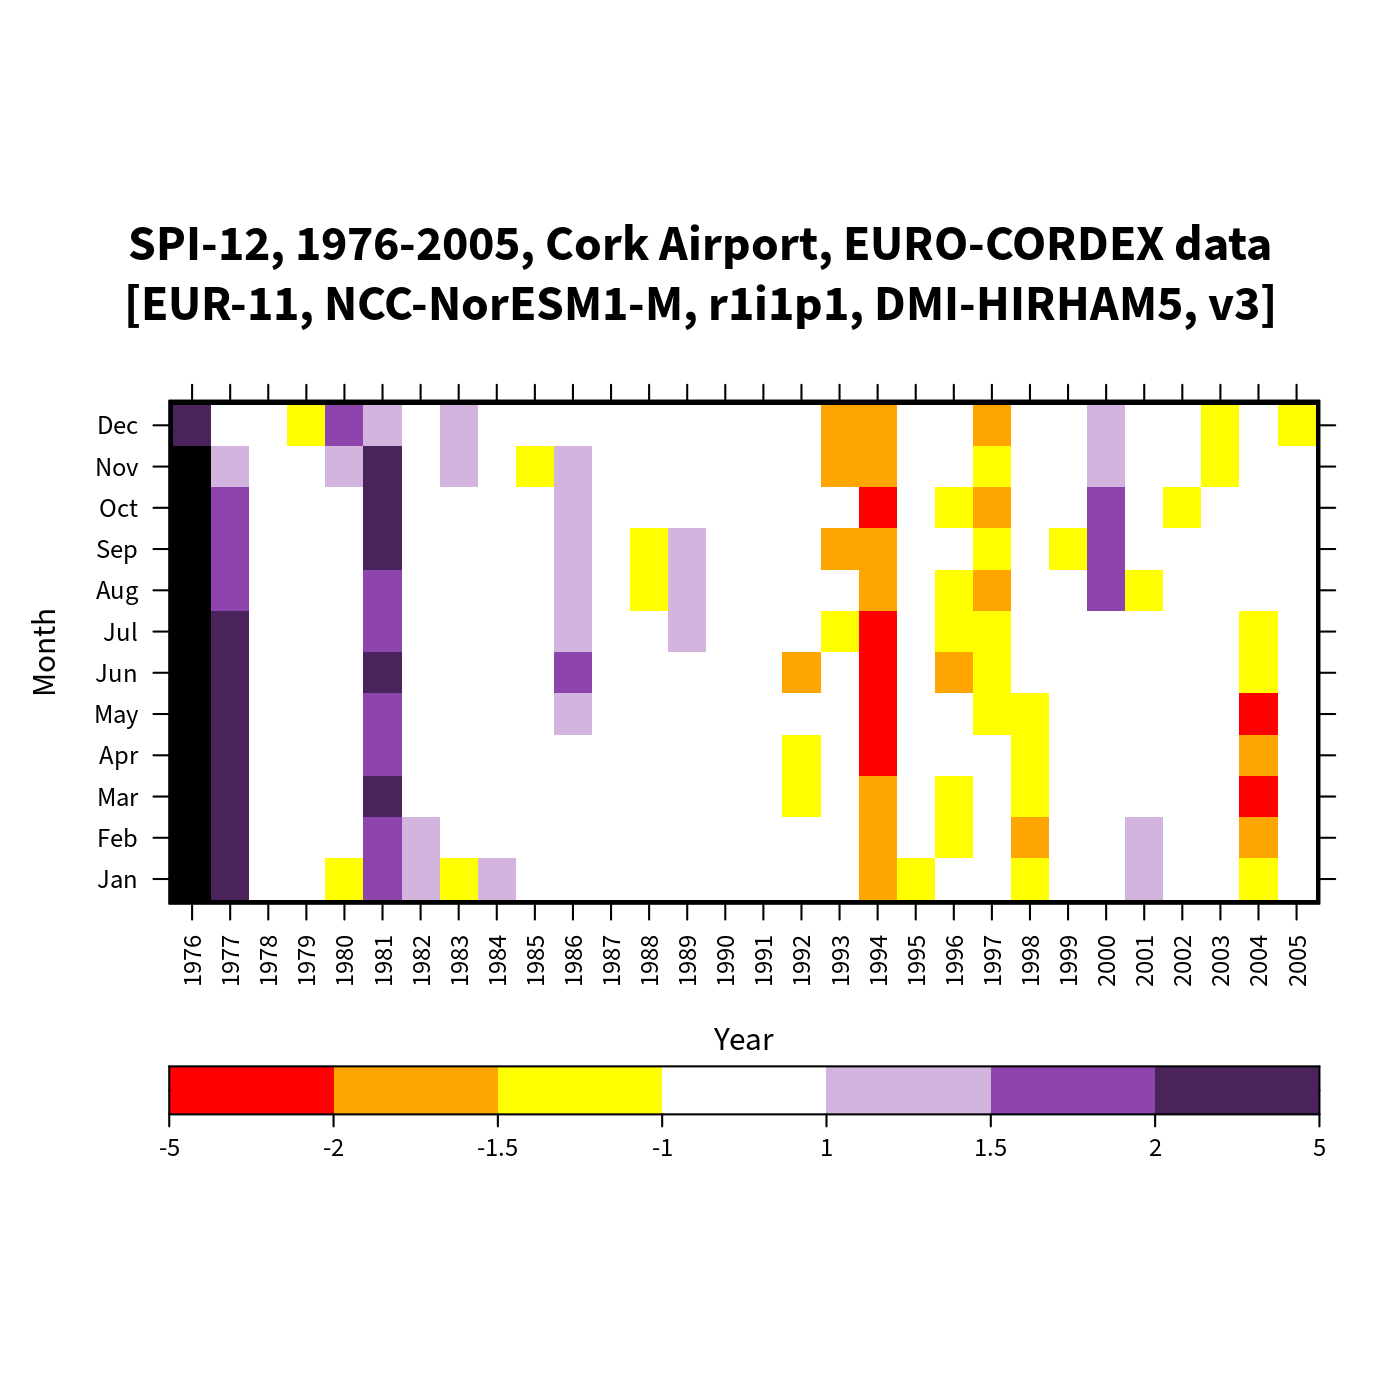

In [36]:
plot_title <- paste(
    "SPI-12, 1976-2005, Cork Airport, EURO-CORDEX data",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spi, plot_title = plot_title)

## SPI-6

In [12]:
spi <- spi_calc(data = pr, spi_num = 6)

In [13]:
# view the data
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,NA,NA,NA,2.24681844,2.30530222,2.06441644,2.23909234,2.89749819,2.25471285,1.68505207
1977,2.81138003,2.213757106,1.65960530,2.30218119,2.06104829,1.38707866,0.27146585,0.62582417,0.37494519,-0.27474233,-0.86869605,-0.79700772
1978,-1.45719468,-2.050950092,-1.19082769,-0.84431811,-0.21237666,-0.15664819,0.44165696,0.88722538,0.42928501,-0.41555167,0.79768131,0.71255697
1979,0.25300061,-0.273176592,-0.35444470,0.32943855,-1.02536194,-0.49218026,-0.39092841,-0.15073888,0.69628788,-0.04895947,-0.13207064,-1.03851903
1980,-1.38312470,-0.538431847,-1.23984679,0.39496570,1.01703217,1.11519834,1.53879503,1.19336941,1.29666935,0.05130406,0.22882499,1.39570568
1981,1.55072470,1.708680059,2.29962960,2.53830776,2.44982555,1.35626187,1.16869197,1.41870360,0.76518309,0.65469816,0.29766672,0.41637477
1982,0.40901441,0.113247222,-0.04174320,-0.01049203,0.21968533,0.00747327,-0.34015541,-0.65147559,-0.44819874,-0.62841676,-0.75977186,-0.89466369
1983,-1.09155262,-0.223971774,0.16760603,1.38197136,0.59023347,0.72145680,1.00588537,0.60490028,0.48969849,-1.23229824,0.67109028,0.74520320
1984,0.73901978,0.663729097,0.01084784,0.09366181,-0.81330344,-0.53711222,-0.37624402,0.07103023,0.12571597,0.53379762,1.76076523,1.36079339


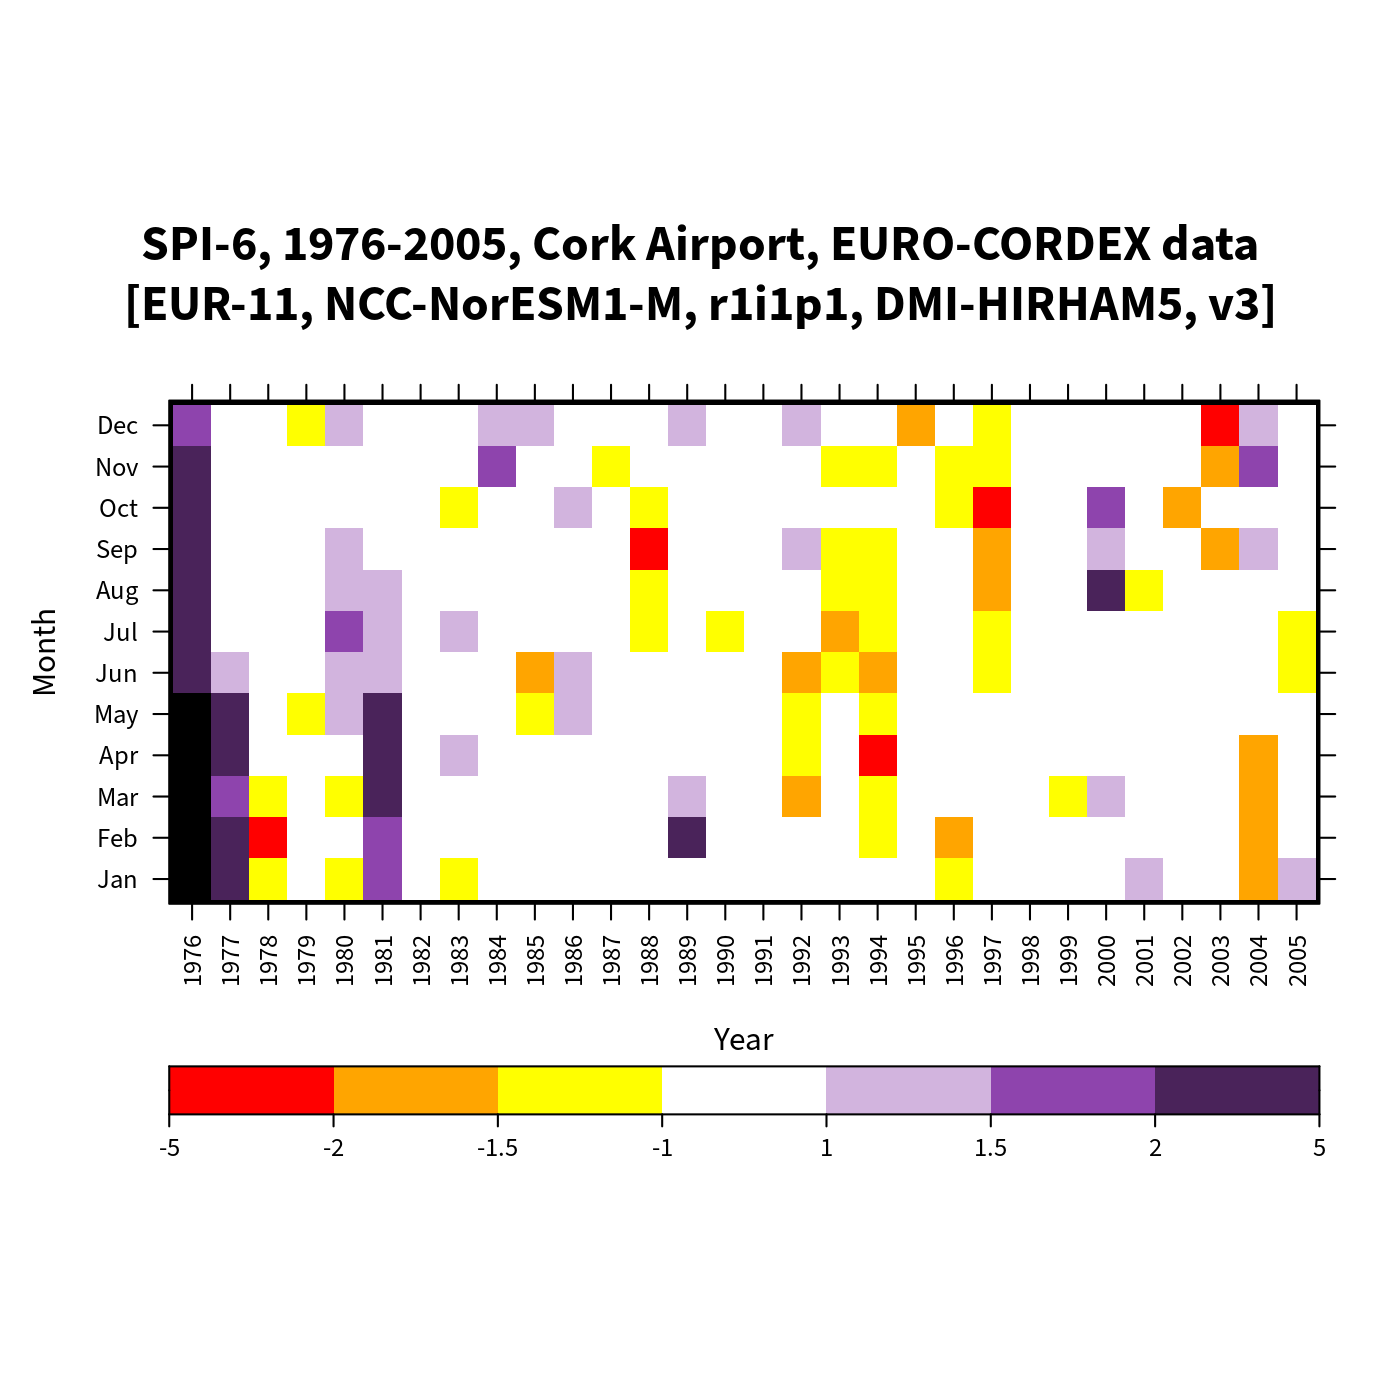

In [14]:
plot_title <- paste(
    "SPI-6, 1976-2005, Cork Airport, EURO-CORDEX data",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spi, plot_title = plot_title)

## SPI-3

In [15]:
spi <- spi_calc(data = pr, spi_num = 3)

In [16]:
# view the data
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,1.634927232,1.50499176,0.92466556,1.60135563,1.9635618934,2.08475779,1.55076504,1.81405893,0.7022283,0.714515211
1977,2.4539933,2.11454381,1.487974777,0.04860320,0.76213825,0.42391595,0.5308468513,0.19519617,0.16217576,-0.89820788,-1.2727504,-1.092475271
1978,-1.3179842,-1.41149102,-0.526274446,0.29366396,1.04281246,0.42927358,0.4498111913,0.28000891,0.23641061,-0.99787324,0.8279600,0.745922955
1979,0.8222618,-1.09056279,-1.131291070,-0.44491813,-0.32474557,0.54936072,0.0940766618,0.19578778,0.49075432,-0.08420581,-0.2801109,-1.794840001
1980,-1.7799419,-0.38178695,-0.067801967,1.76295673,1.80412359,1.73196879,-0.1002324991,-0.18460714,-0.09881031,0.24748235,0.5615788,1.820613190
1981,1.7404390,1.63722831,1.390044671,1.16820008,1.90625751,0.50370299,0.3237813548,0.07134124,0.64107743,0.59916717,0.4028056,-0.002450127
1982,0.1676200,-0.16070818,-0.002072237,-0.13374231,0.52341375,0.09993104,-0.3260332774,-1.71607062,-0.69687040,-0.40462433,0.6071214,-0.407969941
1983,-1.1546970,-0.79488902,0.568460750,2.28558517,1.58518268,0.52198480,-3.1690120077,-0.95552344,0.21783710,1.04654699,1.7034113,0.801616191
1984,0.3185392,-0.71758302,-0.673148576,-0.16979408,-0.39782306,0.03810978,-0.3334767180,0.57481083,0.23410899,1.07299914,1.7483537,1.526351259


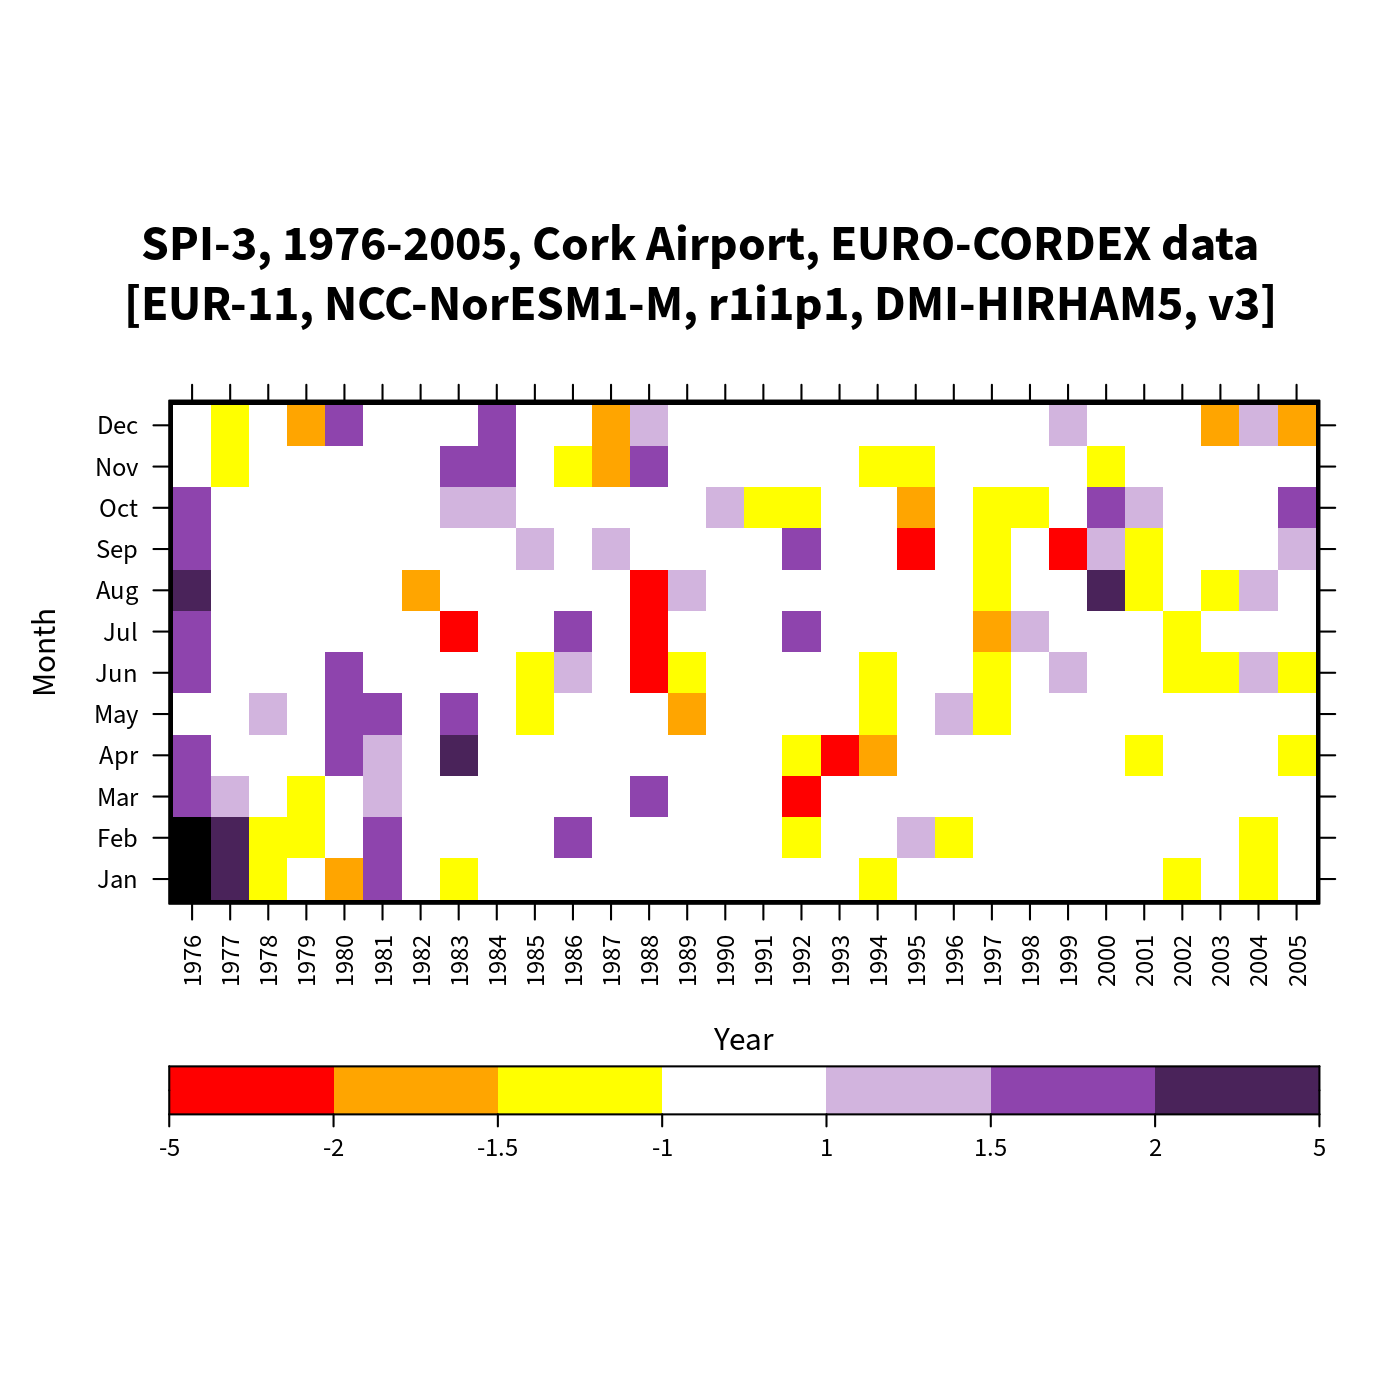

In [17]:
plot_title <- paste(
    "SPI-3, 1976-2005, Cork Airport, EURO-CORDEX data",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spi, plot_title = plot_title)

## SPI-1

In [18]:
spi <- spi_calc(data = pr, spi_num = 1)

In [19]:
# view the data
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,0.30864649,1.67744281,0.91536184,0.199398591,0.77027195,1.922944e+00,-0.111095058,1.58056200,1.25928393,-0.54655466,0.3660385,1.351371892
1977,2.91063104,-1.08189499,0.29694560,0.871369636,0.08917900,-2.804657e-01,1.330413834,-0.39157754,-0.46274797,-0.13529436,-0.9742868,-0.382772638
1978,-0.73598761,-1.00923195,0.93769793,0.688125116,0.17267574,-1.677527e-02,0.912152444,-0.01315376,-0.18370071,-1.12495914,1.5647252,-0.238701307
1979,-0.12800272,-1.25478565,-0.38043429,0.764159583,-1.55209096,1.029287e+00,0.249228269,-1.04253227,1.56387292,-1.04117565,-0.9574718,-0.940417410
1980,-1.14088130,0.95740667,-0.13486209,2.000706498,0.59395987,-1.370345e-01,-0.277560621,0.33186743,-0.05156952,0.37284915,0.6415147,2.282410027
1981,0.84196748,0.06450861,1.80746115,0.490740693,1.14172982,-5.186166e-01,0.201880415,0.69287322,0.47814128,-0.18338870,0.4207021,-0.292297330
1982,0.29420247,-0.13723860,0.10388115,0.074303493,1.14821383,-7.331670e-01,-0.795775865,-1.22255452,0.67331552,0.04624263,0.4084498,-1.383156240
1983,-1.55686449,0.90546175,1.32505800,1.923613309,-3.16089074,-4.902283e-01,-1.422357391,0.17036991,1.25302238,0.24568453,1.1478871,-0.317412873
1984,-0.44630048,-0.26231646,-0.23815228,0.383282002,-0.95071044,4.917456e-01,0.013714953,0.71621827,-0.15630472,1.30249384,1.4887252,-0.374621388


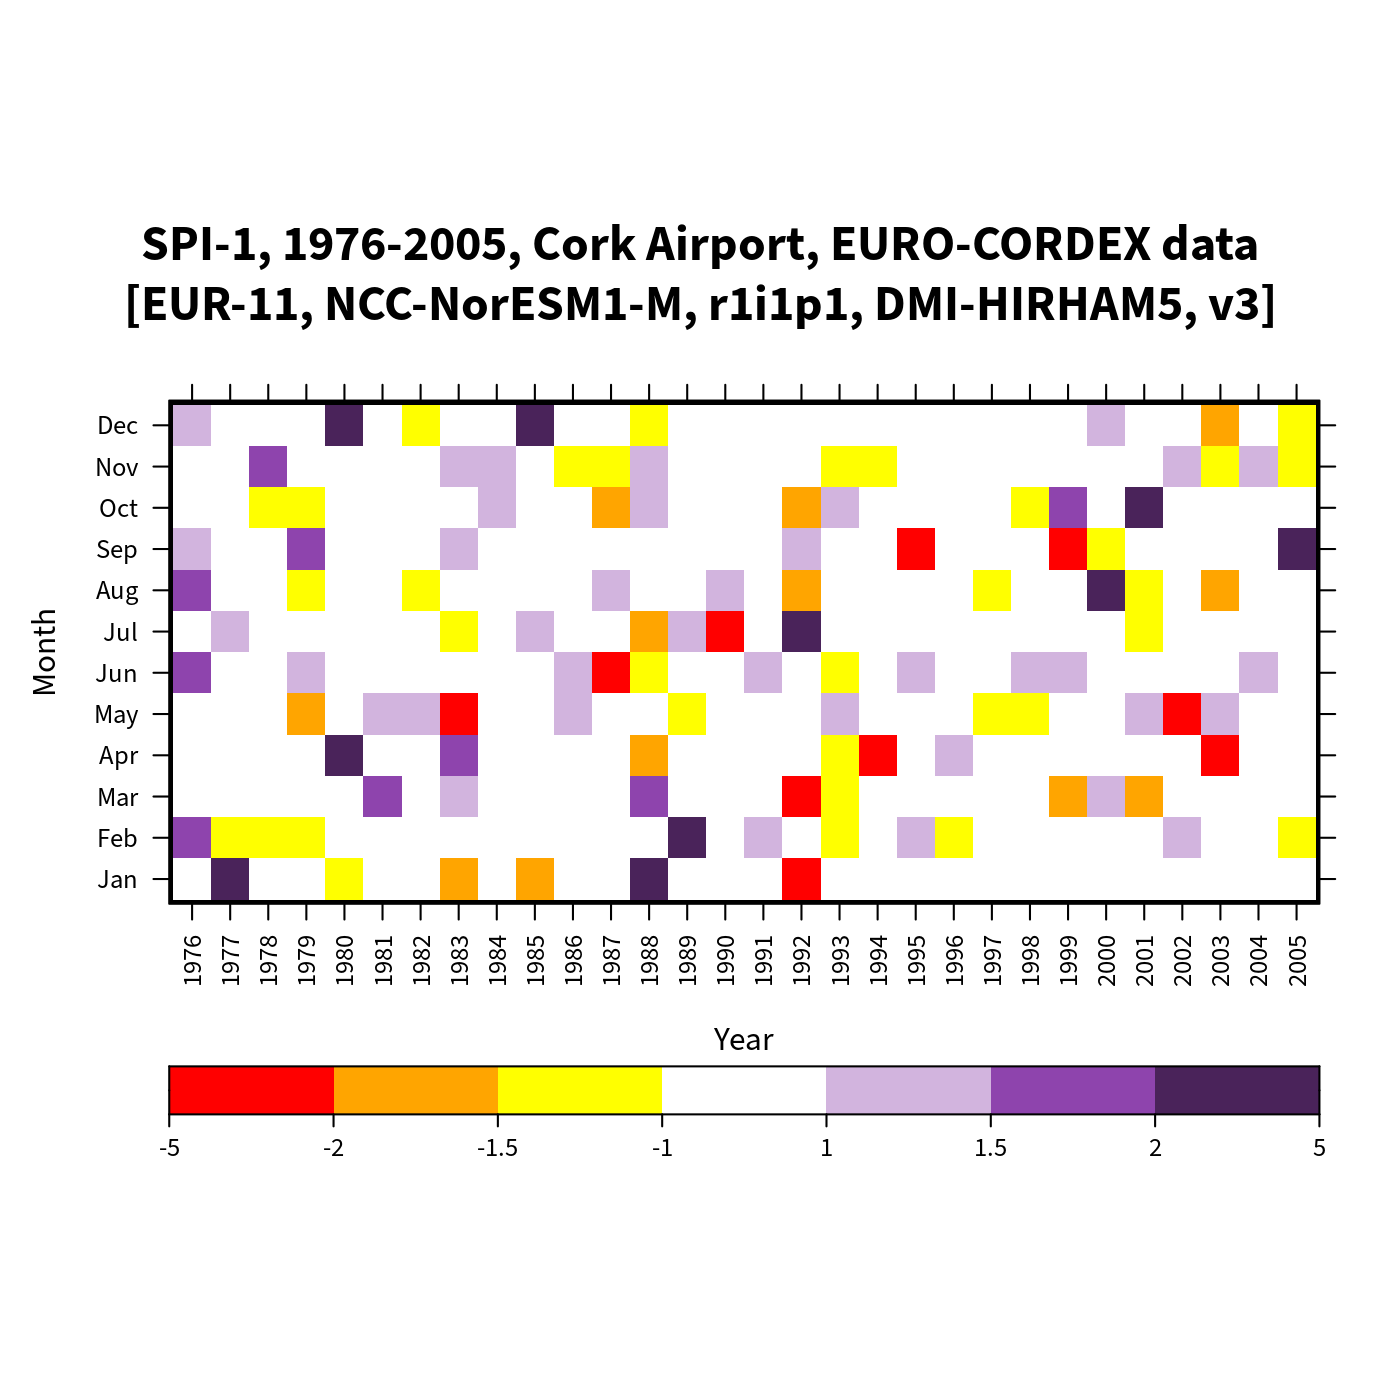

In [20]:
plot_title <- paste(
    "SPI-1, 1976-2005, Cork Airport, EURO-CORDEX data",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spi, plot_title = plot_title)

## Validation

Monthly historical Cork Airport data from Met Éireann: <https://www.met.ie/climate/available-data/historical-data>

Direct download link:

- Data from 1961 to present: <https://cli.fusio.net/cli/climate_data/webdata/mly3904.zip>

In [21]:
# read data
pr <- readLines("./data/met/raw/meteireann/corkairport/mly3904/mly3904.csv")
# https://stackoverflow.com/a/15860268
pr <- pr[-1:-19]
pr <- read.csv(
    textConnection(pr), header = TRUE, stringsAsFactors = FALSE
)

In [22]:
head(pr)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1962,1,5.5,11.6,-3.8,8.2,2.7,NA,-6.3,12.8,70,NA
2,1962,2,5.3,12.3,-2.7,7.9,2.7,NA,-4.4,13.6,57,NA
3,1962,3,4.2,12.2,-5.4,7.5,0.9,NA,-7.2,10.3,63,NA
4,1962,4,7.7,18.8,0.6,11.2,4.1,68.6,-1.3,11.7,62,201.1
5,1962,5,9.7,16.1,2.3,13.3,6.2,80.7,-0.7,12.0,45,216.5
6,1962,6,12.0,21.1,2.4,16.1,7.9,50.2,0.9,11.2,51,236.7


In [23]:
# filter for the past data range
pr <- subset(pr, year < 2006 & year > 1975)

In [24]:
# keep only precipitation data
pr <- subset(pr, select = c(year, month, rain))

In [25]:
# rename rain column to pr
colnames(pr)[3] <- "pr"

In [26]:
head(pr)

,year,month,pr
,<int>,<int>,<dbl>
169,1976,1,90.3
170,1976,2,67.0
171,1976,3,111.0
172,1976,4,20.7
173,1976,5,113.1
174,1976,6,51.6


In [27]:
# convert precipitation to mm/day
# https://stackoverflow.com/a/42045514
pr$pr <- pr$pr/days_in_month(paste(pr$year, "-", pr$month, "-15", sep = ""))

In [28]:
# convert month format
pr$month <- month(pr$month, label = TRUE)

In [29]:
# sort data
pr <- pr[order(pr$year, pr$month),]

In [30]:
# reset row names
rownames(pr) <- NULL

In [31]:
# convert to data table
pr <- as.data.table(pr)

In [32]:
dcast(pr, year~month, value.var = c("pr"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,2.912903,2.3103448,3.5806452,0.690000,3.6483871,1.720000,2.9935484,0.4516129,3.5633333,6.7677419,3.473333,4.7580645
1977,5.229032,8.4678571,4.8354839,1.330000,1.3193548,1.213333,0.9709677,4.0322581,2.3233333,7.1709677,3.076667,6.5806452
1978,3.432258,5.9321429,3.2451613,3.300000,0.8322581,1.996667,2.6741935,3.6806452,1.4900000,1.5838710,3.206667,8.5483871
1979,3.619355,6.8500000,3.3064516,1.320000,3.3419355,2.243333,0.5225806,2.8645161,1.6900000,4.9580645,3.290000,6.9806452
1980,4.329032,5.1758621,3.5258065,1.263333,1.1903226,1.553333,3.8129032,3.9677419,5.0233333,5.0806452,3.596667,4.2419355
1981,1.348387,3.4642857,6.8870968,1.010000,6.9806452,2.470000,1.1677419,0.6032258,5.6366667,2.5645161,3.556667,5.4354839
1982,4.387097,6.0000000,3.4032258,1.546667,2.9903226,5.513333,0.9354839,3.3838710,4.0200000,6.7580645,6.343333,4.6258065
1983,4.674194,3.5678571,3.3419355,2.853333,3.2225806,1.880000,1.2645161,2.3032258,6.4800000,3.6419355,2.580000,4.8548387
1984,6.258065,2.9586207,1.9580645,1.770000,1.4000000,1.576667,1.4935484,1.9032258,2.9533333,3.9838710,6.236667,3.2096774


### SPI-12

In [33]:
spi <- spi_calc(data = pr, spi_num = 12)

In [34]:
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.76717686
1977,-0.29056388,0.94671641,1.20992491,1.20697769,0.8431304,0.750852718,0.35661301,0.98576116,0.81814664,0.833840249,0.80031637,1.22131129
1978,0.87254173,0.34846607,0.03810508,0.38431963,0.3106479,0.462623383,0.77588929,0.68012780,0.56282255,-0.541204957,-0.54830962,-0.10606780
1979,-0.09036942,0.11296953,0.13258000,-0.27411420,0.2146885,0.262345839,-0.16766920,-0.32615287,-0.31673800,0.352547581,0.38346509,0.11655082
1980,0.24670821,-0.08940721,-0.04133916,-0.06687646,-0.5086614,-0.659299398,0.01589053,0.21894225,0.88549343,0.846101248,0.94525504,0.47910609
1981,-0.16136457,-0.49284697,0.20204755,0.12073190,1.2206672,1.391717667,0.89473454,0.24458870,0.37946386,-0.119710069,-0.13917279,0.14508953
1982,0.75405793,1.19766067,0.55915315,0.59435007,-0.1545091,0.445539348,0.39361058,0.87843851,0.62669018,1.323039851,1.88426385,1.84634166
1983,1.92010282,1.39110655,1.41523302,1.50648481,1.6252326,0.976107333,1.02252261,0.78965204,1.30983302,0.668146833,-0.03698477,0.04953329
1984,0.36187568,0.23459012,-0.03856706,-0.26181472,-0.6518645,-0.722521104,-0.66800938,-0.73072802,-1.59627338,-1.400632572,-0.67693702,-1.02991282


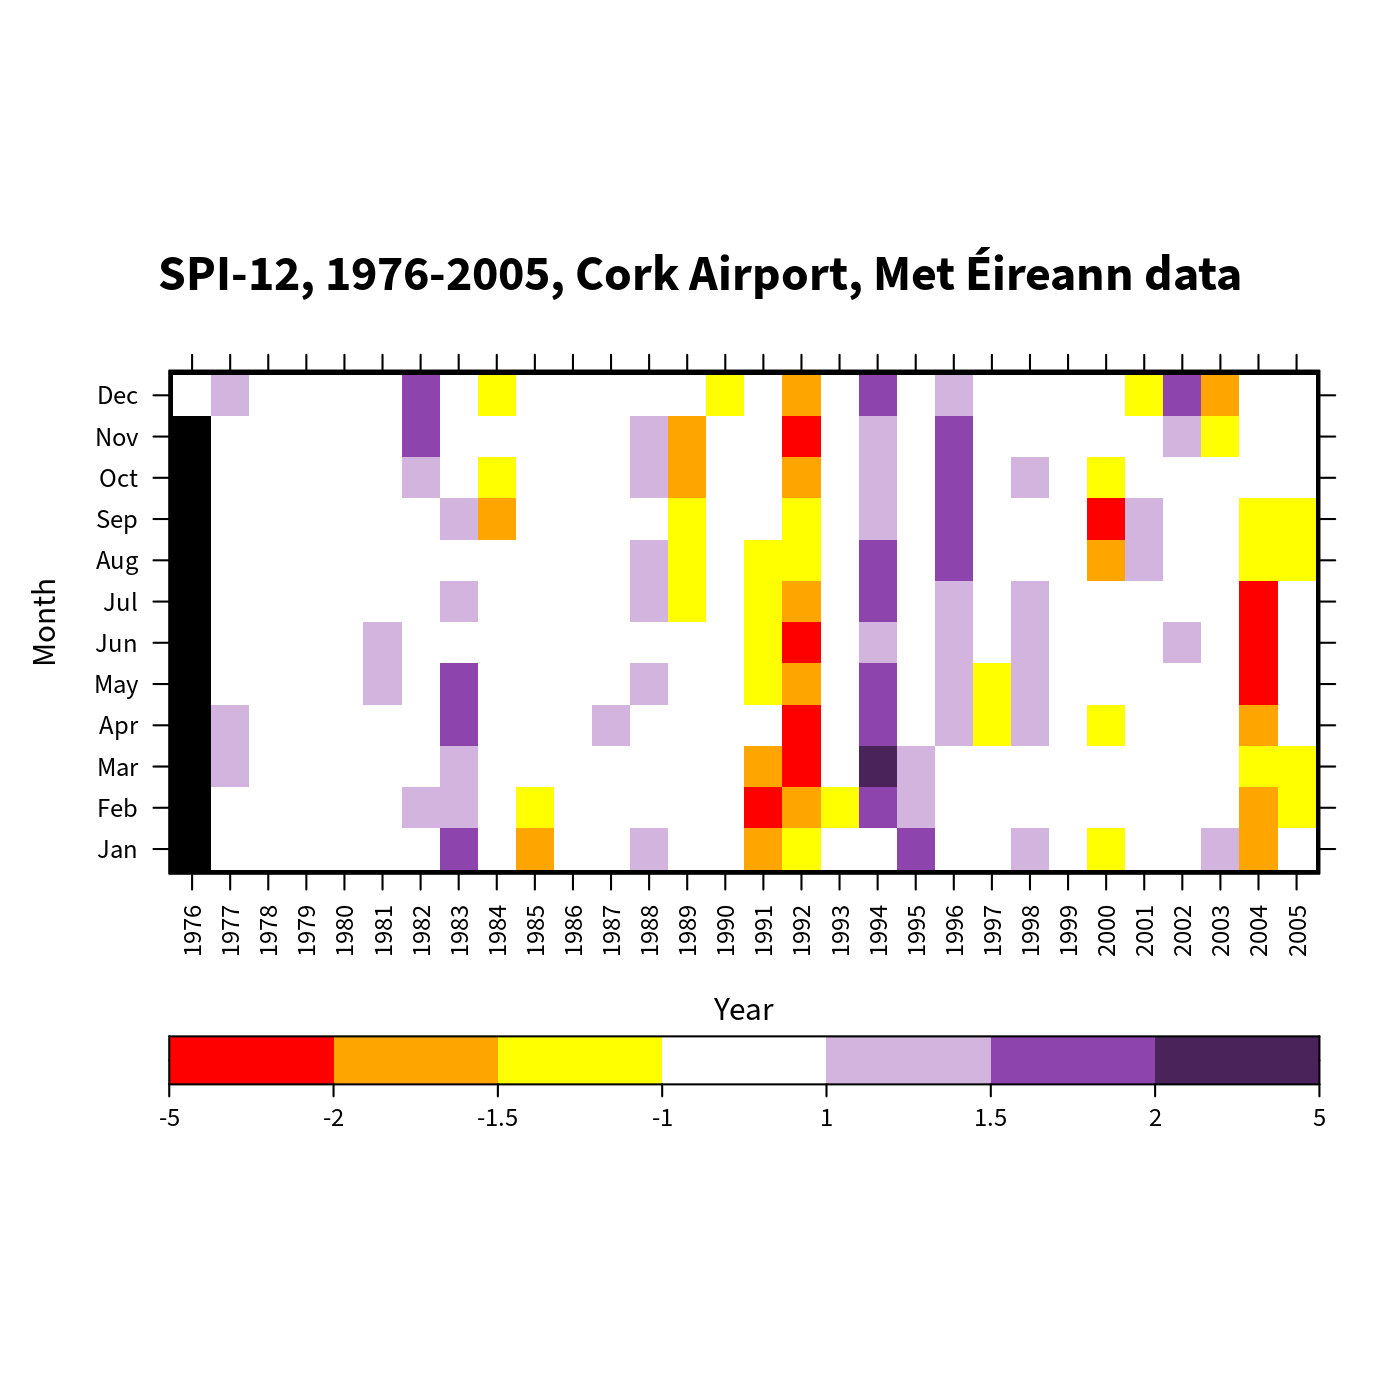

In [35]:
plot_title <- "SPI-12, 1976-2005, Cork Airport, Met Éireann data"

spi_plot(data = spi, plot_title = plot_title)

### SPI-6

In [36]:
spi <- spi_calc(data = pr, spi_num = 6)

In [37]:
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,NA,NA,NA,-1.136531983,-0.68765257,-0.95730987,-0.8681948,0.432519531,-0.07388010,0.201071530
1977,0.23867738,1.48396214,1.612184058,1.1364297,1.0034467,0.890065618,0.37123282,-0.73804100,-1.5634465,-0.276444983,-0.13452691,0.865415728
1978,0.82892847,0.82597507,0.926819444,0.6377790,0.4729616,-0.024947871,0.32236622,-0.06150391,-0.5565842,-2.129502473,-1.64175243,-0.065265761
1979,-0.32049952,0.21324170,0.509649625,0.8950180,1.2056615,0.474560984,0.19746201,-0.77401401,-1.2607397,-0.782563551,-1.27900786,-0.356813223
1980,0.20503268,0.43310590,0.718030548,0.4310023,0.2906449,-0.491523372,-0.14717359,-0.19515201,0.3382020,0.899459198,1.18996617,1.326373301
1981,-0.01745752,-0.30879445,0.034211385,-0.4591360,0.5999519,0.834451057,1.49209763,0.94991978,0.6457899,0.521845581,-1.11728078,-0.819082279
1982,-0.30558333,0.65274883,0.176078673,0.3815971,0.5648641,1.224516014,1.04512011,0.56381975,0.7930552,1.772409943,2.27611718,1.424798174
1983,1.56983873,1.09132297,0.904646797,0.6050464,0.2519411,0.185112917,-0.27780885,-0.34195918,0.6842956,0.318123821,-0.35017781,-0.084683383
1984,0.70802212,0.50019173,-0.447526990,-0.4990041,-0.4495111,-0.815046017,-2.16424630,-2.13024004,-1.5996878,-1.683200752,-0.35098697,-0.535371924


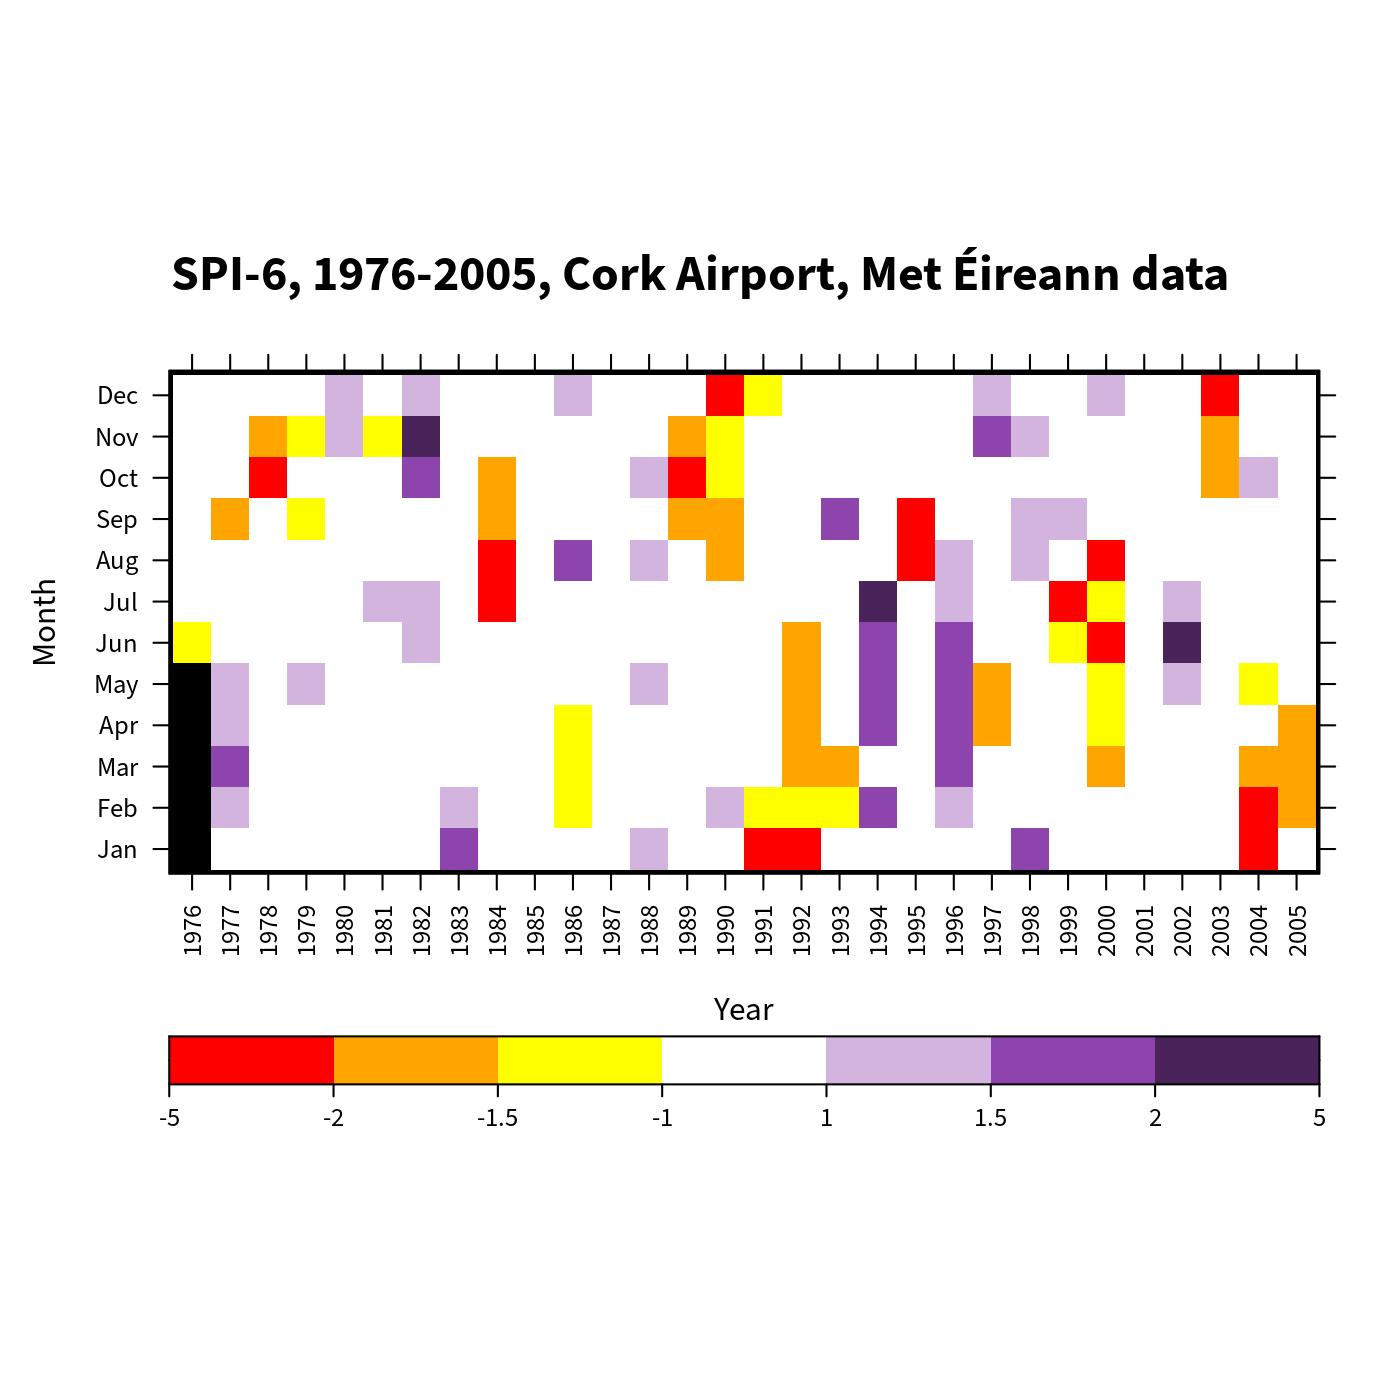

In [38]:
plot_title <- "SPI-6, 1976-2005, Cork Airport, Met Éireann data"

spi_plot(data = spi, plot_title = plot_title)

### SPI-3

In [39]:
spi <- spi_calc(data = pr, spi_num = 3)

In [40]:
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,-0.76294552,-1.29760627,-0.06032623,-5.308096e-01,0.5775345,-1.174620253,-0.505399980,0.09158632,0.83429048,0.646287068
1977,0.27472760,1.19924943,1.80015239,1.59856631,-0.24525381,-1.725224e+00,-1.9729429,-0.626474462,-0.360140006,1.04106149,0.43812445,1.160619875
1978,0.16353910,0.71544121,0.39372448,0.95694756,-0.29211192,-4.978183e-01,-0.7370168,0.317486758,-0.132288069,-1.65710984,-2.14950878,0.142291127
1979,0.81845793,1.30176941,0.70039960,0.63430536,-0.03973961,-1.506135e-01,-0.4260860,-0.923428457,-1.501199492,-0.40311872,-0.50347477,0.713024405
1980,0.60407416,0.82361517,0.50654479,0.10980651,-0.94901595,-1.633902e+00,-0.2086097,0.697905396,1.664142900,1.21421526,0.80188371,0.008349257
1981,-1.16050896,-0.94833064,0.14118095,0.59604122,2.26944562,1.172382e+00,1.4158854,-1.724364199,-0.323796235,-0.69851964,0.16268355,-0.447708829
1982,0.25056375,0.69059812,0.70410694,0.45707780,-0.05148009,1.036555e+00,0.9940602,0.880973420,0.075886071,1.24244496,1.79589854,1.400033923
1983,0.89121145,0.04826416,0.10811532,0.03583408,0.53034804,2.797794e-01,-0.2991726,-1.020292262,0.737506142,0.67676256,0.48137488,-0.616927455
1984,0.34339176,0.32064597,-0.01055359,-1.24691927,-1.40245215,-1.198822e+00,-1.3272357,-1.282674734,-0.820931600,-0.68311341,0.63482478,0.171053741


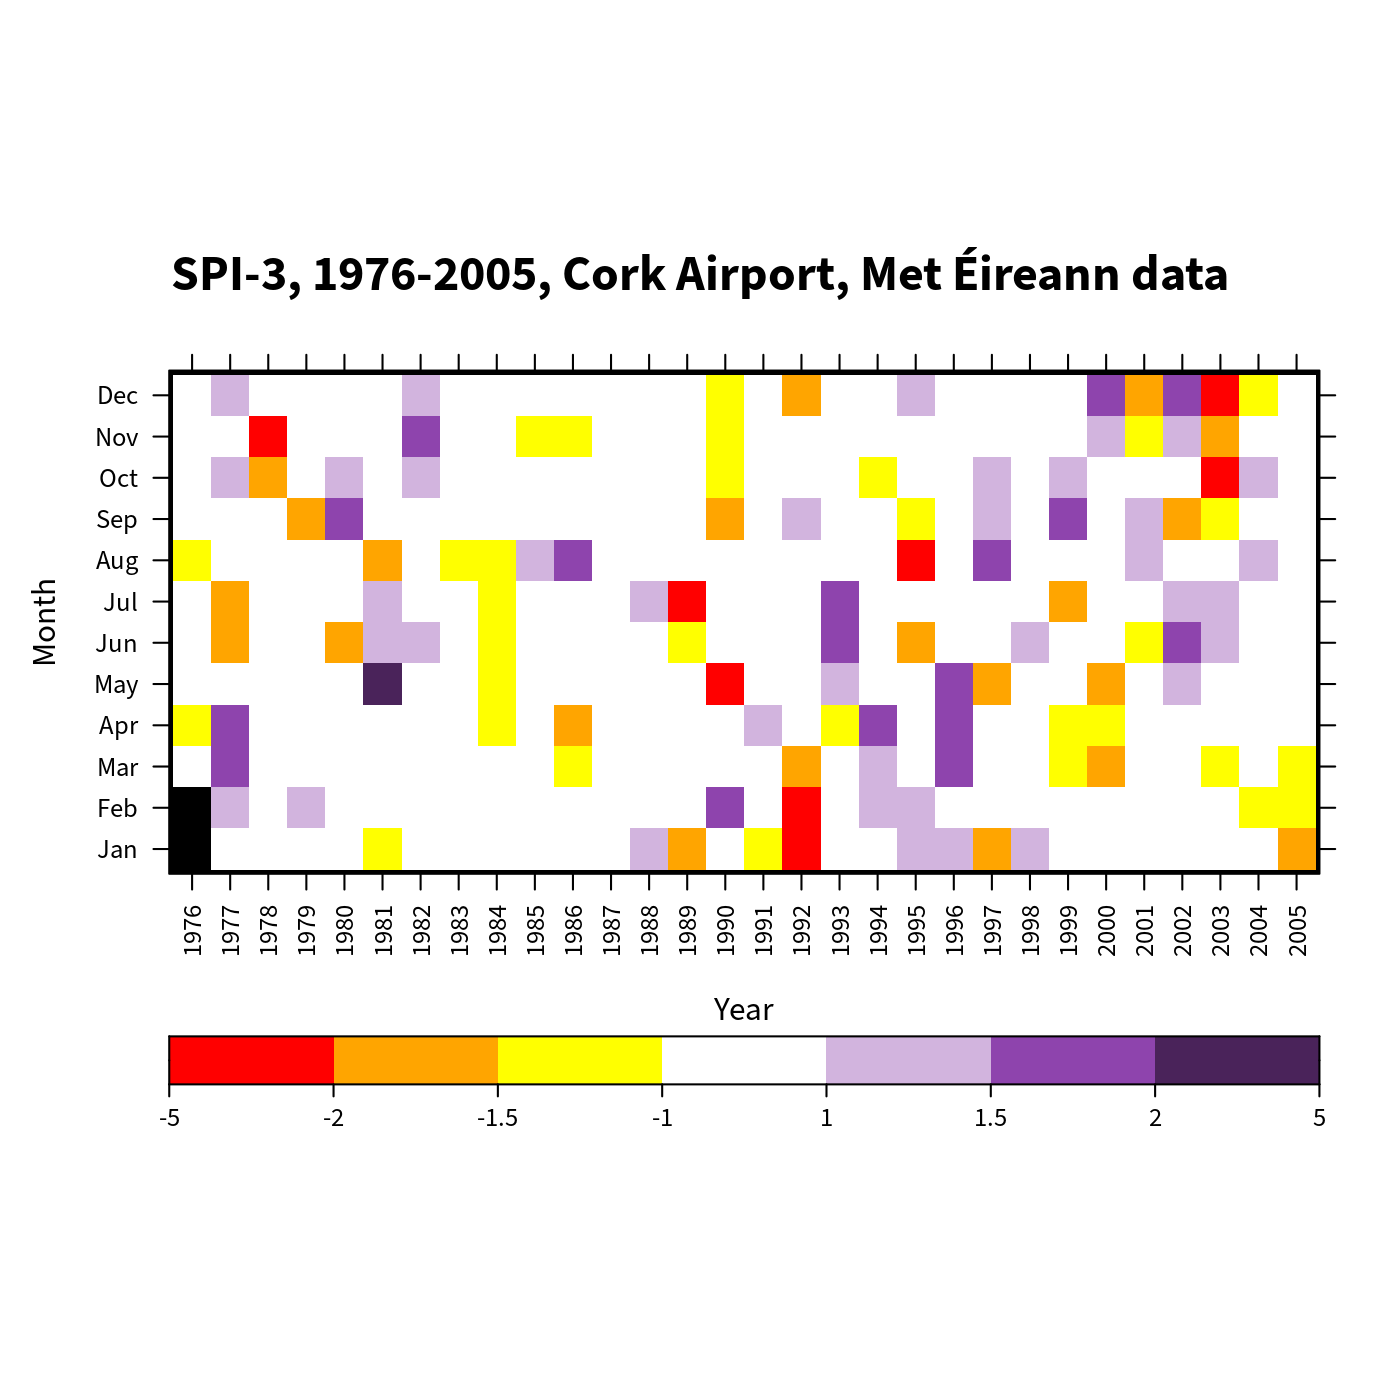

In [41]:
plot_title <- "SPI-3, 1976-2005, Cork Airport, Met Éireann data"

spi_plot(data = spi, plot_title = plot_title)

### SPI-1

In [42]:
spi <- spi_calc(data = pr, spi_num = 1)

In [43]:
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,-0.59344164,-0.70136159,0.3415218,-1.86462672,0.80508969,-0.57167449,0.7849889,-1.801435434,0.45600077,1.0265998,-0.10495652,0.18251967
1977,0.69345905,1.57783176,1.0746545,-0.92180282,-0.63144279,-1.17577110,-1.2064459,0.618005783,-0.28993081,1.1651627,-0.37080206,0.94932337
1978,-0.25706767,0.84940304,0.1173555,0.73453352,-1.14887190,-0.29302697,0.5508183,0.481708699,-0.96491363,-1.7102811,-0.28124462,1.63475514
1979,-0.14440994,1.13259575,0.1594237,-0.93367440,0.66114442,-0.06600039,-2.0498602,0.128200586,-0.78263209,0.3279022,-0.22512394,1.09837353
1980,0.25040964,0.59391134,0.3058626,-1.00217197,-0.75294558,-0.75475687,1.3196997,0.593597512,1.13850178,0.3800821,-0.02650190,-0.06946209
1981,-1.96800920,-0.09289711,2.0442897,-1.33830689,2.02517829,0.12821845,-0.9259091,-1.557329781,1.38680496,-0.9346733,-0.05174575,0.48699293
1982,0.28073977,0.87126827,0.2248017,-0.67868948,0.48495281,2.02667826,-1.2612579,0.359833432,0.68638105,1.0232098,1.38853876,0.11976451
1983,0.42692033,-0.04554667,0.1835418,0.43508455,0.60275851,-0.40708665,-0.8000924,-0.156565420,1.70171559,-0.2960407,-0.73891591,0.22770533
1984,1.14257348,-0.33905218,-0.9275218,-0.45175377,-0.55971576,-0.72833125,-0.5270453,-0.390107581,0.11555651,-0.1209972,1.34204739,-0.64374400


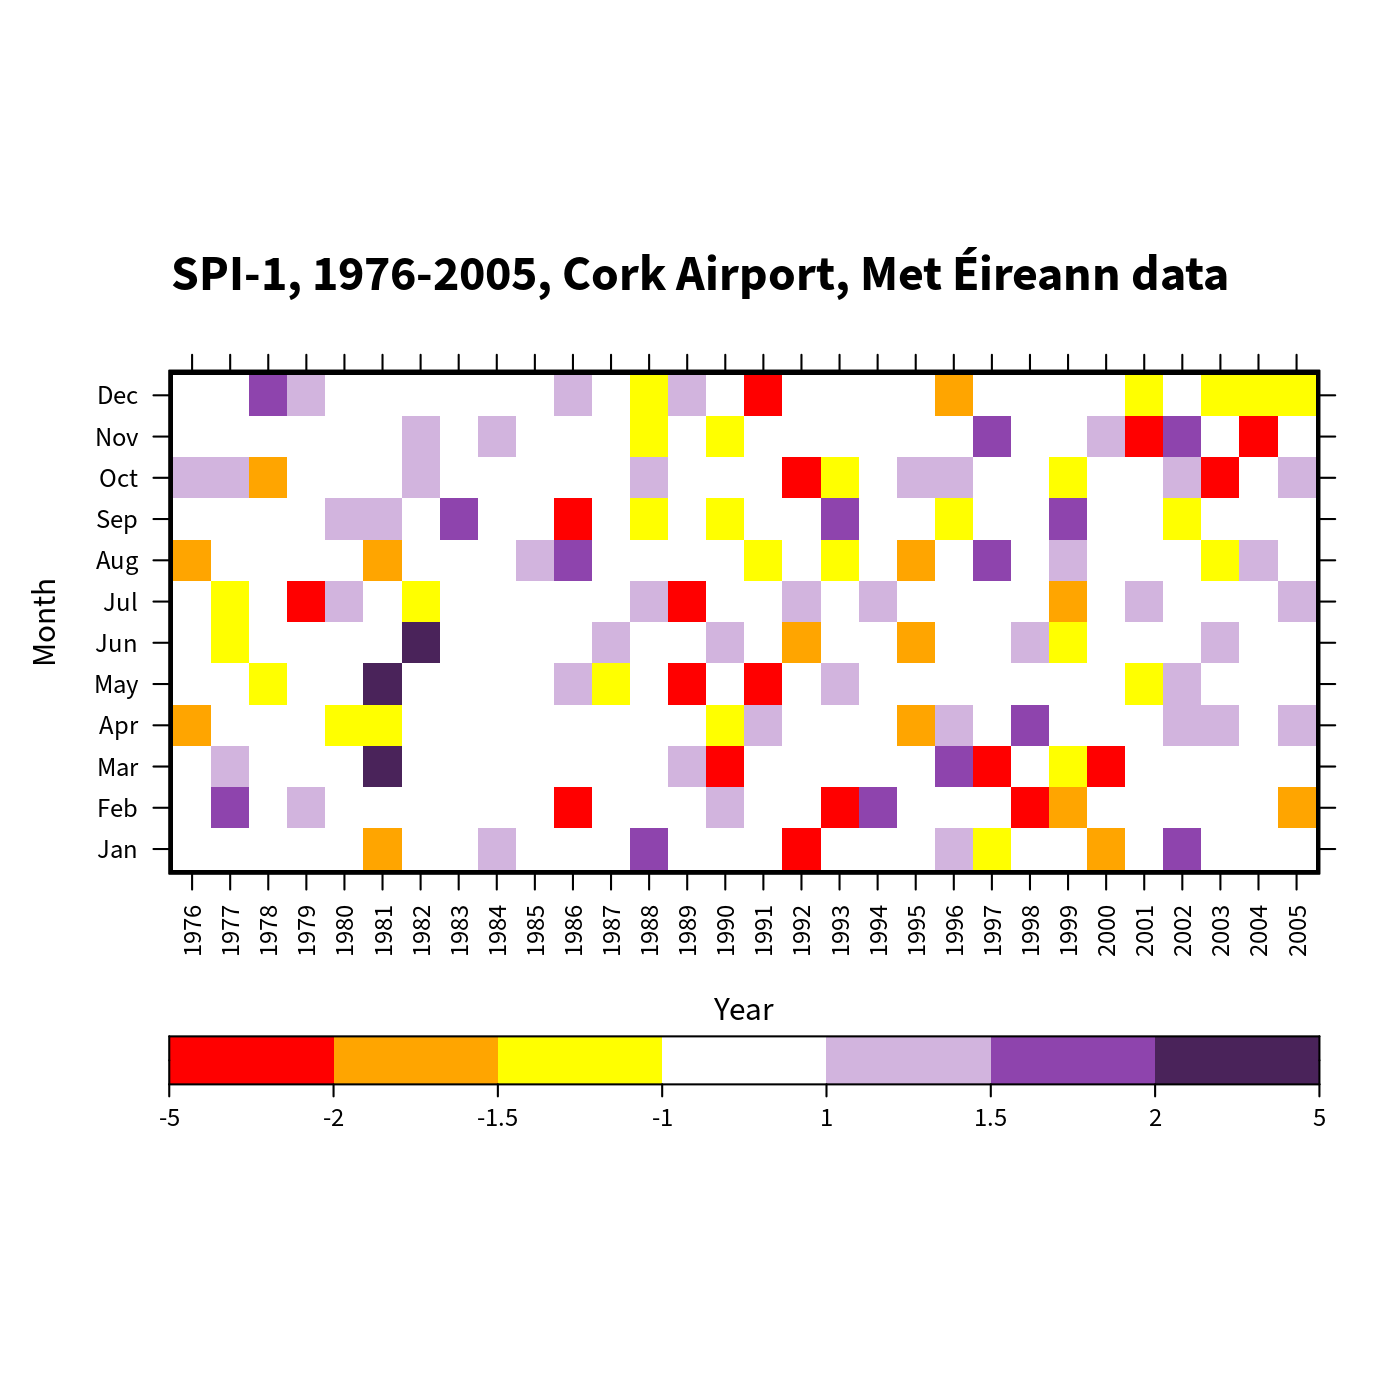

In [44]:
plot_title <- "SPI-1, 1976-2005, Cork Airport, Met Éireann data"

spi_plot(data = spi, plot_title = plot_title)